### Business Understanding

Tujuan dari proyek ini adalah untuk memprediksi harga rumah berdasarkan berbagai fitur properti, seperti lokasi, ukuran, jumlah kamar tidur, dan faktor relevan lainnya. Prediksi harga rumah yang akurat sangat penting bagi agen real estate, pembeli rumah, dan investor karena membantu dalam pengambilan keputusan terkait penilaian properti dan tren pasar. Memahami faktor-faktor yang berpengaruh signifikan terhadap harga rumah juga dapat membantu para pemangku kepentingan dalam mengidentifikasi properti yang undervalued atau menentukan waktu yang tepat untuk menjual. Wawasan yang dihasilkan dari analisis ini dapat mendukung optimalisasi strategi penetapan harga, peningkatan proyeksi pasar, dan perbaikan proses pengambilan keputusan di pasar properti.

### Data Understanding

Dataset yang telah dikumpulkan adalah dataset housing_price_dataset.csv yang berasal dari situs Kaggle yang diunggah oleh Muhammad Bin Imran tahun 2023. Berikut adalah keterangan dari masing-masing kolom:
- SquareFeet : Luas rumah dalam skala feet persegi
- Bedrooms : Jumlah kamar tidur
- Bathrooms : Jumlah kamar mandi
- Neighborhood : Area perumahan
- YearBuilt : Tahun dibangun
- Price : Harga rumah

In [3]:
# import library yang diperlukan

import pandas as pd

In [4]:
# memuat dataset

df = pd.read_csv('housing_price_dataset.csv')

In [5]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [6]:
df.shape

(50000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [8]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [9]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

,0
SquareFeet,993.000000
Bedrooms,1.000000
Bathrooms,2.000000
YearBuilt,36.000000
Price,109417.769827


In [10]:
# Melihat batas bawah/minimum dari Interquartile Range (IQR)
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

,0
SquareFeet,23.500000
Bedrooms,1.500000
Bathrooms,-2.000000
YearBuilt,1913.000000
Price,5829.205484


In [11]:
# Melihat batas atas/maksimum dari Interquartile Range (IQR)
batas_atas = q3 + (1.5 * iqr)
batas_atas

,0
SquareFeet,3995.500000
Bedrooms,5.500000
Bathrooms,6.000000
YearBuilt,2057.000000
Price,443500.284793


In [12]:
# menampung kolom dengan tipe data selain object
df_ex_object = df.select_dtypes(exclude=['object'])

In [13]:
# Filter outlier pada dataset dengan batas bawah dan atas
outlier_filter = ((df_ex_object < batas_bawah) | (df_ex_object > batas_atas))
outlier_filter

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
49995,False,False,False,False,False
49996,False,False,False,False,False
49997,False,False,False,False,False
49998,False,False,False,False,False


In [14]:
## Menghitung Jumlah Outlier Pada Data
for col in outlier_filter.columns :

    # Exclude kolom dengan tipe data object
    if df[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

Nama Kolom: SquareFeet
SquareFeet
False    50000
Name: count, dtype: int64
-------------------
Nama Kolom: Bedrooms
Bedrooms
False    50000
Name: count, dtype: int64
-------------------
Nama Kolom: Bathrooms
Bathrooms
False    50000
Name: count, dtype: int64
-------------------
Nama Kolom: YearBuilt
YearBuilt
False    50000
Name: count, dtype: int64
-------------------
Nama Kolom: Price
Price
False    49941
True        59
Name: count, dtype: int64
-------------------


In [15]:
# Persentase Outliers
length_outliers_percentage = len(outlier_filter[outlier_filter.Price==True]) / len(df['Price']) * 100
length_outliers_percentage

0.11800000000000001

In [16]:
# Import Library yg dibutuhkan

# Library Numpy
import numpy as np
# Pyplot
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

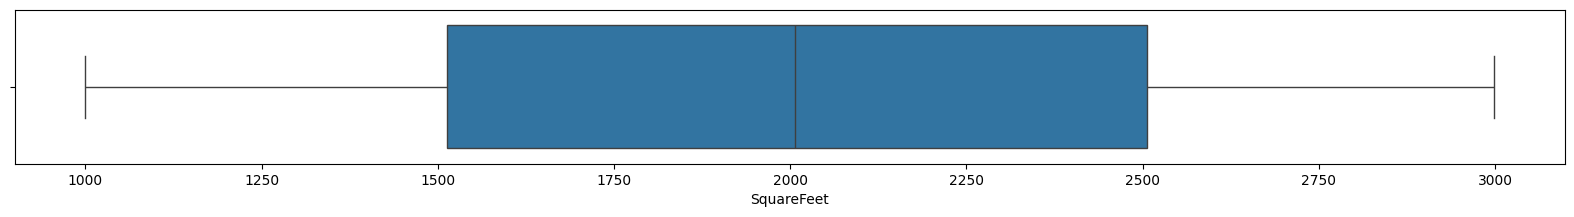

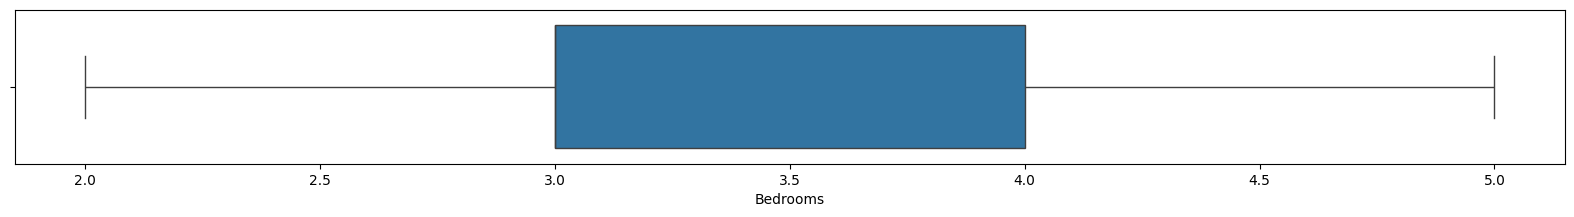

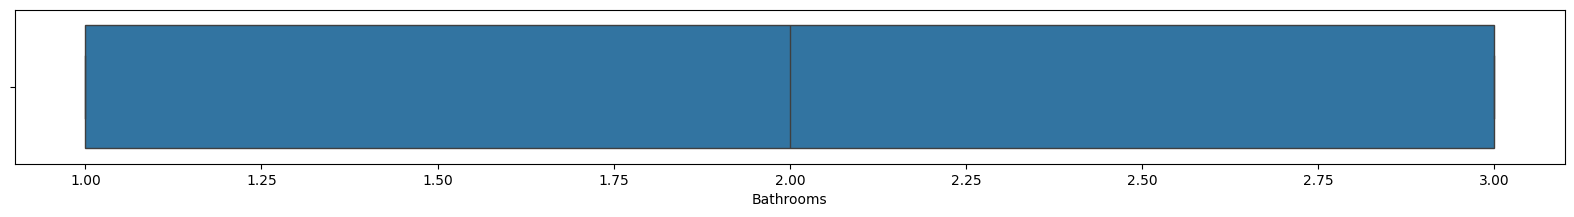

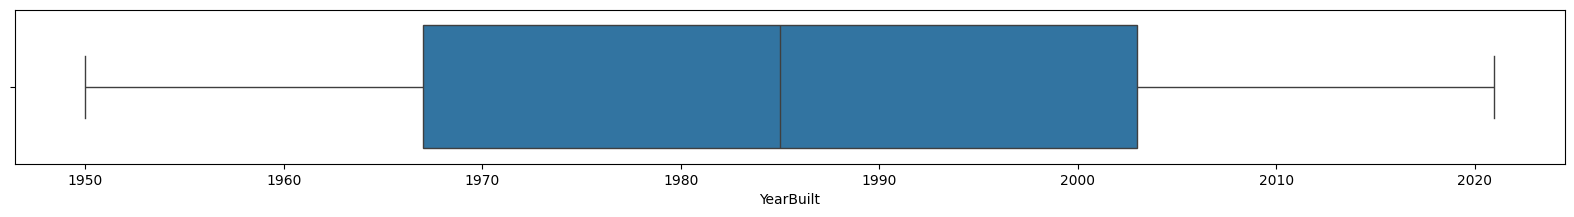

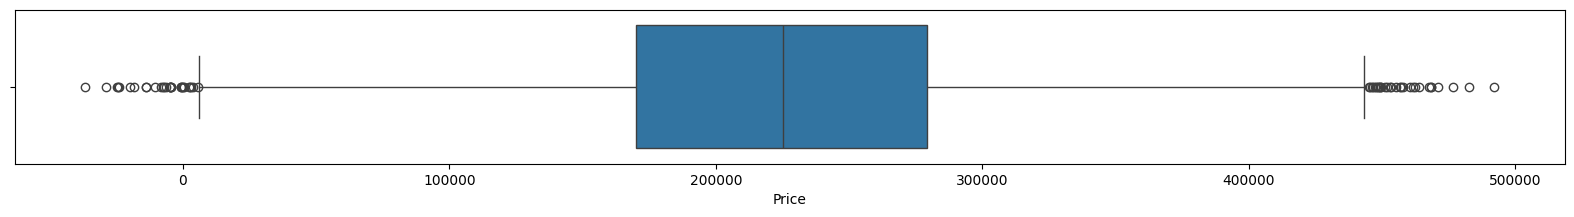

In [17]:
# Mencari Outliers - Boxplot

# Exclude tipe data object
df_outlier = df.select_dtypes(exclude='object')
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

Berdasarkan boxplot diatas, dapat diketahui bahwa kolom Price memiliki outlier yang melebihi batas bawah minimum dan batas atas maksimum

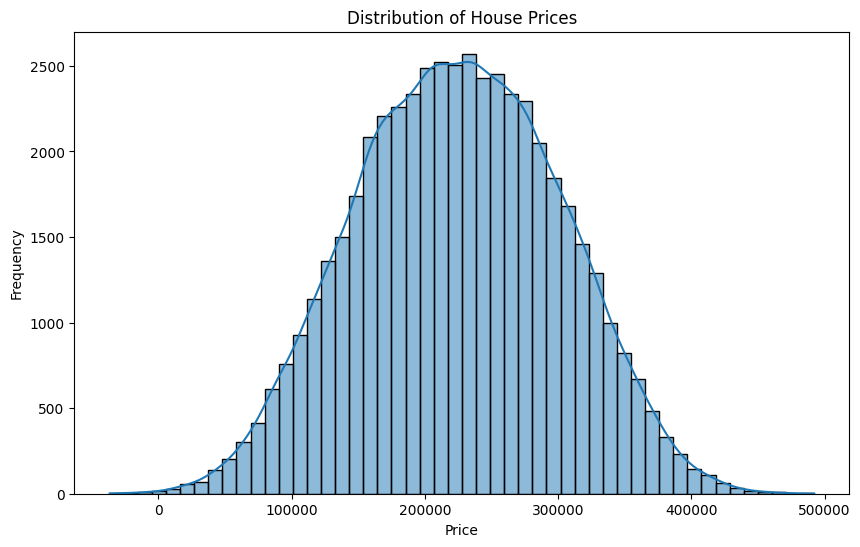

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Grafik distribusi harga rumah di atas menunjukkan pola persebaran harga rumah yang cukup menarik. Terlihat bahwa sebagian besar rumah memiliki harga yang berkisar antara 100.000 hingga 300.000. Distribusi ini membentuk kurva berbentuk lonceng yang simetris, mengindikasikan bahwa harga rumah cenderung terpusat pada suatu nilai tengah dan semakin jarang ditemukan harga yang jauh di atas atau di bawah nilai tengah tersebut. Bentuk kurva ini sering disebut sebagai distribusi normal.

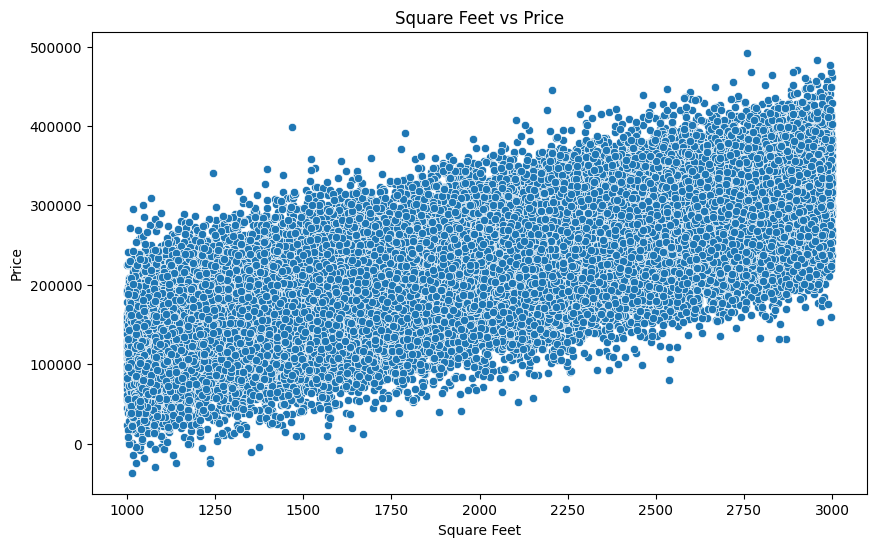

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFeet', y='Price', data=df)
plt.title('Square Feet vs Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

Scatterplot di atas menggambarkan hubungan antara luas (dalam kaki persegi) suatu properti dengan harga jualnya. Secara umum, terdapat korelasi positif yang kuat antara luas dan harga. Artinya, semakin luas suatu properti, cenderung semakin tinggi pula harganya.

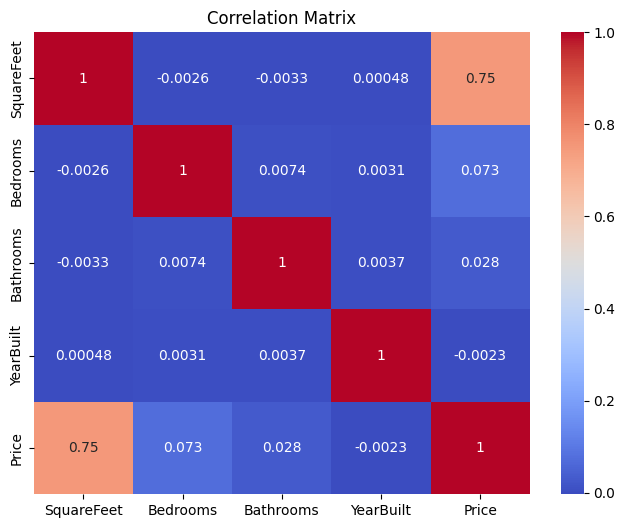

In [20]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.drop(columns=['Neighborhood']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap ini, dapat dinyimpulkan bahwa luas (square feet) adalah prediktor terkuat untuk harga properti dalam dataset ini. Faktor-faktor lain seperti jumlah kamar tidur, kamar mandi, dan tahun dibangun memiliki pengaruh yang jauh lebih kecil terhadap harga.

### Data Preparation

#### Cek Missing Value

In [21]:
# Mengecek data yang kosong

df.isna().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


Tidak ditemukan data kosong pada dataset ini, sehingga tidak diperlukan imputasi data

#### Mengatasi Outliers

In [22]:
# import library winsorize

from scipy.stats.mstats import winsorize

In [23]:
# winsorize data pada kolom Price

df['Price'] = winsorize(df['Price'], limits=[0.01, 0.01])

<Axes: xlabel='Price'>

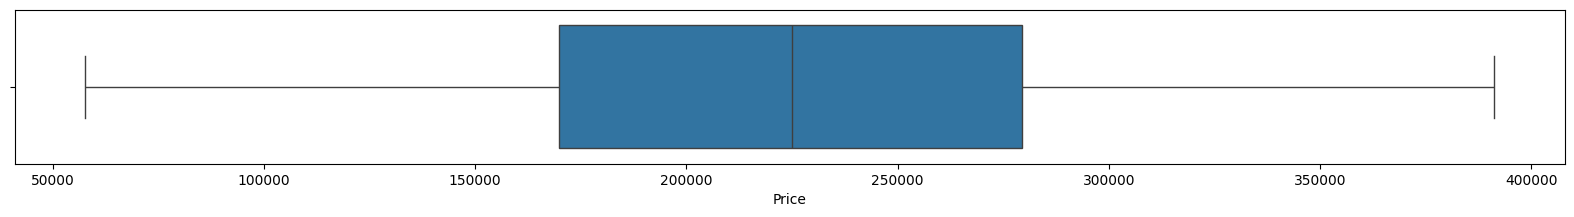

In [24]:
# Mencari Outliers - Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x=df['Price'])

In [25]:
# Melihat nilai maksimal dari kolom Price
df['Price'].max()

391305.3243649902

In [26]:
# Melihat nilai minimal dari kolom Price
df['Price'].min()

57693.11512567874

In [27]:
# Melakukan standardisasi dengan library Sklearn
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Memilih fitur yang akan dilakukan standarisasi
columns_to_scale = ['SquareFeet','YearBuilt']

# melakukan standarisasi
standard_df = scaler.fit_transform(df[columns_to_scale])
standard_df = pd.DataFrame(standard_df, columns = columns_to_scale)

standard_df.head()

,SquareFeet,YearBuilt
0,0.207861,-0.791751
1,0.786480,-0.260842
2,-0.254340,-0.743486
3,0.499777,0.511390
4,0.214811,0.752713


In [28]:
# Melakukan normalisasi dengan library Sklearn
from sklearn.preprocessing import MinMaxScaler

# inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Memilih fitur yang akan dilakukan normalisasi
columns_to_scale = ['SquareFeet','YearBuilt']

# melakukan normalisasi
minmax_df = scaler.fit_transform(df[columns_to_scale])
minmax_df = pd.DataFrame(minmax_df, columns = columns_to_scale)

minmax_df.head()

,SquareFeet,YearBuilt
0,0.563282,0.267606
1,0.729865,0.422535
2,0.430215,0.281690
3,0.647324,0.647887
4,0.565283,0.718310


In [29]:
# Melakukan standardisasi dengan library Sklearn
from sklearn.preprocessing import RobustScaler

# inisialisasi RobustScaler
scaler = RobustScaler()

# Memilih kolom yang akan distandarisasi oleh RobustScaler
columns_to_scale = ['SquareFeet','YearBuilt']

# Melakukan standarisasi
robust_df = scaler.fit_transform(df[columns_to_scale])
robust_df = pd.DataFrame(robust_df, columns = columns_to_scale)

robust_df.head()

,SquareFeet,YearBuilt
0,0.119839,-0.444444
1,0.455186,-0.138889
2,-0.148036,-0.416667
3,0.289023,0.305556
4,0.123867,0.444444


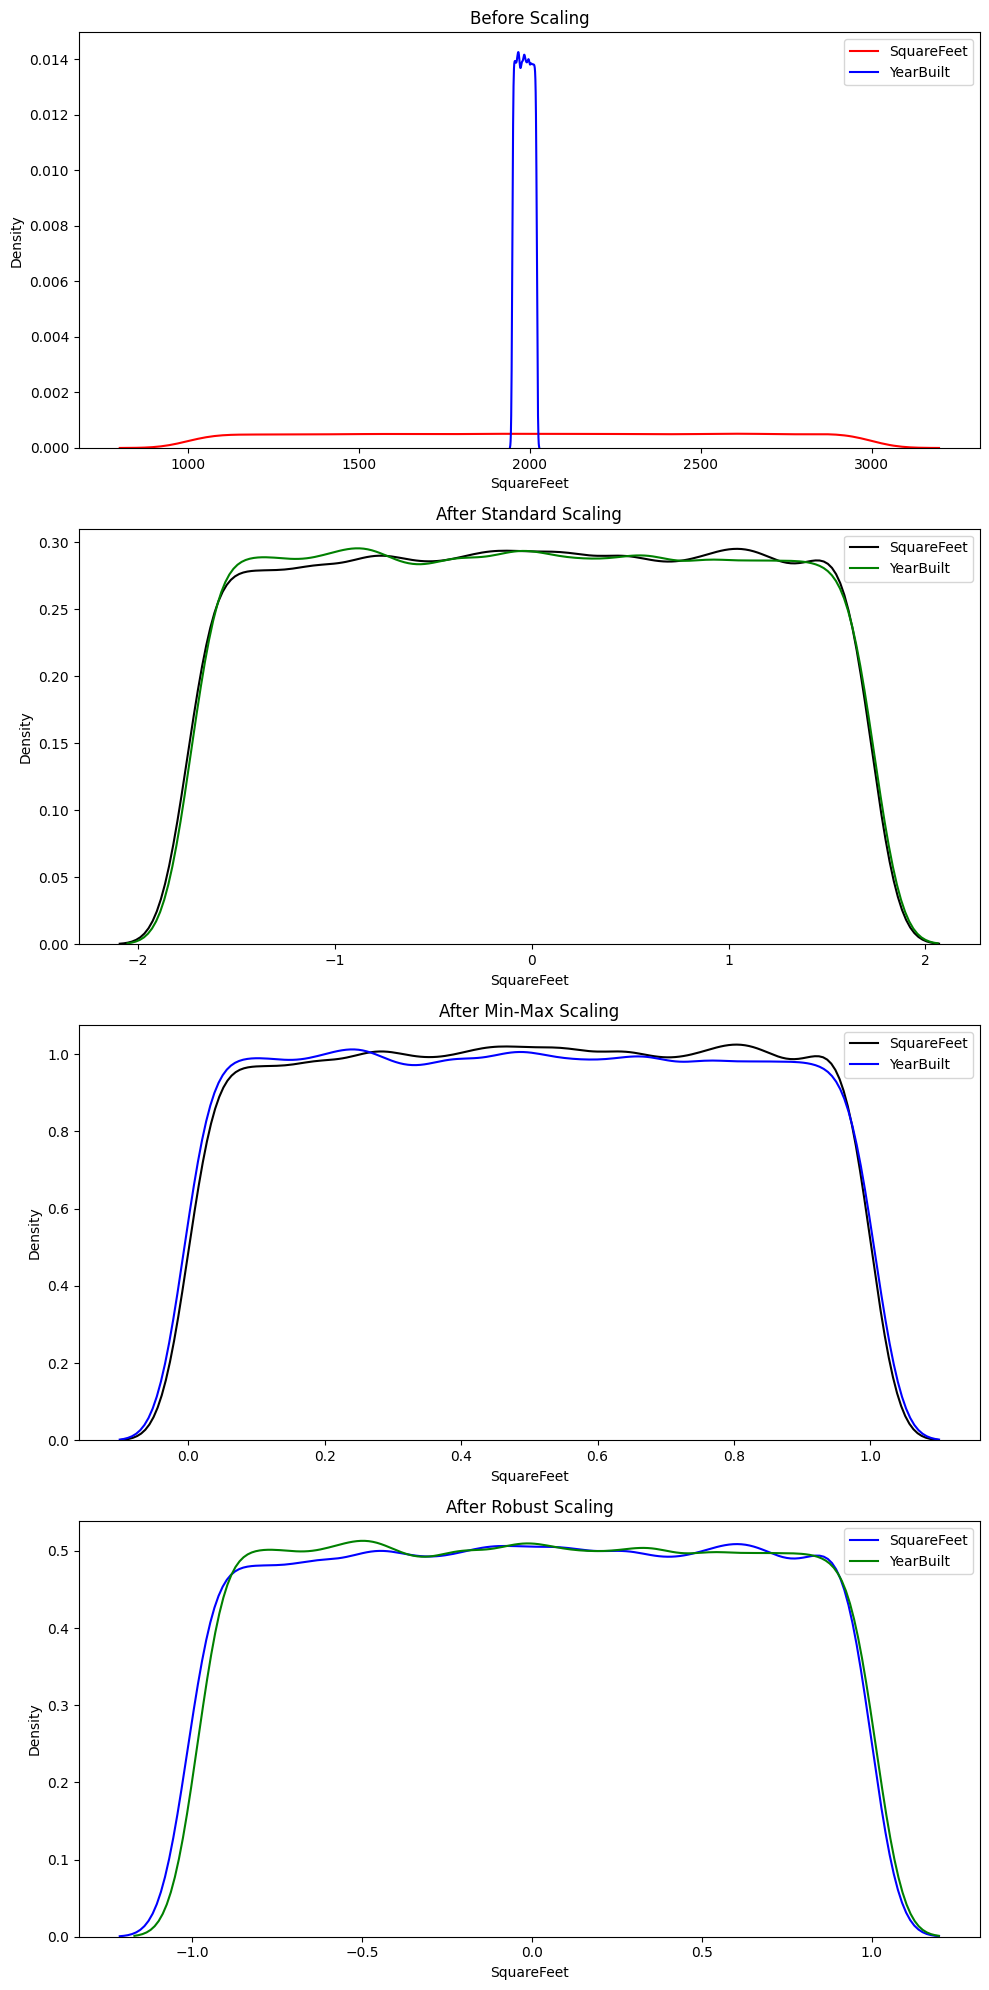

In [30]:
fig, axes = plt.subplots(nrows=4, figsize=(10, 20))

axes[0].set_title('Before Scaling')
sns.kdeplot(df[columns_to_scale[0]], ax=axes[0], color='r', label=columns_to_scale[0])
sns.kdeplot(df[columns_to_scale[1]], ax=axes[0], color='b', label=columns_to_scale[1])
axes[0].legend()

axes[1].set_title('After Standard Scaling')
sns.kdeplot(standard_df[columns_to_scale[0]], ax=axes[1], color='black', label=columns_to_scale[0])
sns.kdeplot(standard_df[columns_to_scale[1]], ax=axes[1], color='g', label=columns_to_scale[1])
axes[1].legend()

axes[2].set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df[columns_to_scale[0]], ax=axes[2], color='black', label=columns_to_scale[0])
sns.kdeplot(minmax_df[columns_to_scale[1]], ax=axes[2], color='b', label=columns_to_scale[1])
axes[2].legend()

axes[3].set_title('After Robust Scaling')
sns.kdeplot(robust_df[columns_to_scale[0]], ax=axes[3], color='blue', label=columns_to_scale[0])
sns.kdeplot(robust_df[columns_to_scale[1]], ax=axes[3], color='green', label=columns_to_scale[1])
axes[3].legend()

plt.tight_layout()
plt.show()

In [31]:
# CV before scaling
cv_before_scaling = np.std(df[columns_to_scale]) / df[columns_to_scale].mean(axis=0)

# CV after scaling
cv_standard = np.std(standard_df[columns_to_scale]) / df[columns_to_scale].mean(axis=0)
cv_minmax = np.std(minmax_df[columns_to_scale]) / df[columns_to_scale].mean(axis=0)
cv_robust = np.std(robust_df[columns_to_scale]) / df[columns_to_scale].mean(axis=0)

print('CV Before Scaling:\n', cv_before_scaling)
print('-'*70)
print('CV After Standard Scaling:\n', cv_standard)
print('-'*70)
print('CV After Min-Max Scaling:\n', cv_minmax)
print('-'*70)
print('CV After Robust Scaling:\n', cv_robust)

CV Before Scaling:
 SquareFeet    0.286839
YearBuilt     0.010436
dtype: float64
----------------------------------------------------------------------
CV After Standard Scaling:
 SquareFeet    0.000498
YearBuilt     0.000504
dtype: float64
----------------------------------------------------------------------
CV After Min-Max Scaling:
 SquareFeet    0.000143
YearBuilt     0.000147
dtype: float64
----------------------------------------------------------------------
CV After Robust Scaling:
 SquareFeet    0.000289
YearBuilt     0.000290
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=ax

Berdasarkan hasil CV diatas, maka akan digunakan data dengan standardscaler, karena memiliki nilai yang lebih besar daripada yang lainnya.

In [32]:
# menggabungkan kedua DataFrame berdasarkan indeks
df = df.drop(['SquareFeet','YearBuilt'], axis=1)
df_final = pd.concat([df, standard_df], axis=1)

# menampilkan 5 baris pertama dari DataFrame gabungan
df_final.head()

,Bedrooms,Bathrooms,Neighborhood,Price,SquareFeet,YearBuilt
0,4,1,Rural,215355.283618,0.207861,-0.791751
1,3,2,Rural,195014.221626,0.786480,-0.260842
2,2,1,Suburb,306891.012076,-0.254340,-0.743486
3,2,1,Urban,206786.787153,0.499777,0.511390
4,5,2,Suburb,272436.239065,0.214811,0.752713


In [33]:
# menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Neighborhood']

# melakukan One Hot Encoding
df_final = pd.get_dummies(
    data=df_final,
    columns=cat_col, dtype='int64'
)
df_final.head()

,Bedrooms,Bathrooms,Price,SquareFeet,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,4,1,215355.283618,0.207861,-0.791751,1,0,0
1,3,2,195014.221626,0.786480,-0.260842,1,0,0
2,2,1,306891.012076,-0.254340,-0.743486,0,1,0
3,2,1,206786.787153,0.499777,0.511390,0,0,1
4,5,2,272436.239065,0.214811,0.752713,0,1,0


In [34]:
# Memisahkan data training (X) dan data target (y)
X = df_final.drop(['Price'], axis=1)
y = df_final['Price']

In [35]:
# Membagi dataset ke data latih dan data uji

# Import fungsi train_test_split untuk membagi data dari libray sklearn dan modul model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Modelling

Setelah data sudah siap untuk dilakukan pelatihan, maka tahap selanjutnya adalah pemodelan. Pemodelan pada dataset ini akan menggunakan 4 algoritma berbeda, yaitu:

- Linear Regression
- Gradient Boosting Regression
- K-Neighbors Regression
- Support Vector Regression

In [37]:
# import library model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [38]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluasi
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [39]:
# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [40]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluasi
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [41]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluasi
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

### Evaluation

Evaluasi akan menggunakan metriks Mean Absolute Error, Mean Squared Error dan R-Squared dalam memprediksi harga rumah.
1. MAE (Mean Absolute Error): Mengukur rata-rata kesalahan absolut dari prediksi. Semakin kecil, semakin baik.
2. MSE (Mean Squared Error): Mengukur kesalahan kuadrat, lebih sensitif terhadap kesalahan besar. Semakin kecil, semakin baik.
3. R² (R-Squared): Mengukur seberapa baik model menjelaskan variabilitas data. Nilai mendekati 1 menunjukkan model yang lebih baik.

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hasil
print("Linear Regression:")
print(f"  MAE: {mae_linear}")
print(f"  MSE: {mse_linear}")
print(f"  R²: {r2_linear}")
print("-" * 30)

print("KNN Regression:")
print(f"  MAE: {mae_knn}")
print(f"  MSE: {mse_knn}")
print(f"  R²: {r2_knn}")
print("-" * 30)

print("Gradient Boosting Regression:")
print(f"  MAE: {mae_gb}")
print(f"  MSE: {mse_gb}")
print(f"  R²: {r2_gb}")
print("-" * 30)

print("Support Vector Regression:")
print(f"  MAE: {mae_svr}")
print(f"  MSE: {mse_svr}")
print(f"  R²: {r2_svr}")
print("-" * 30)

Linear Regression:
  MAE: 39063.75755987884
  MSE: 2361275705.0872
  R²: 0.5787771426723065
------------------------------
KNN Regression:
  MAE: 42899.16757137138
  MSE: 2863887748.4210343
  R²: 0.48911726917076226
------------------------------
Gradient Boosting Regression:
  MAE: 39095.34024256929
  MSE: 2366798846.4968734
  R²: 0.5777918814421185
------------------------------
Support Vector Regression:
  MAE: 60230.58937042941
  MSE: 5405594252.055614
  R²: 0.03570775259345027
------------------------------


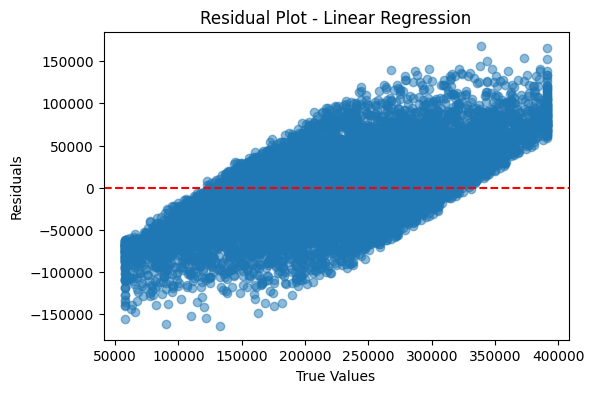

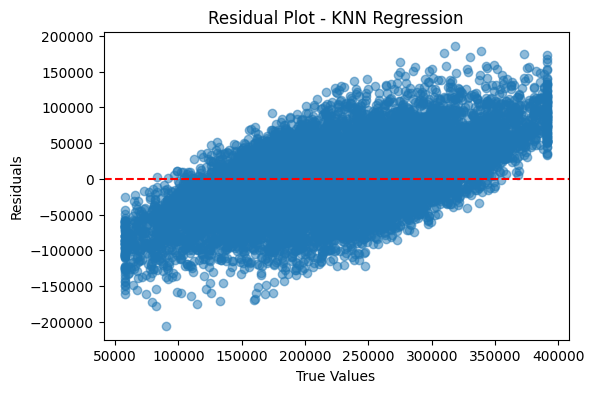

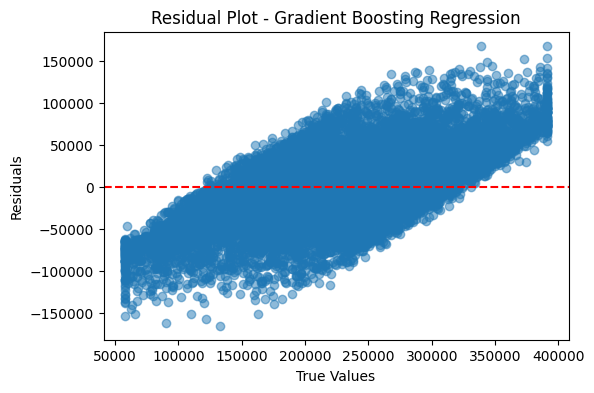

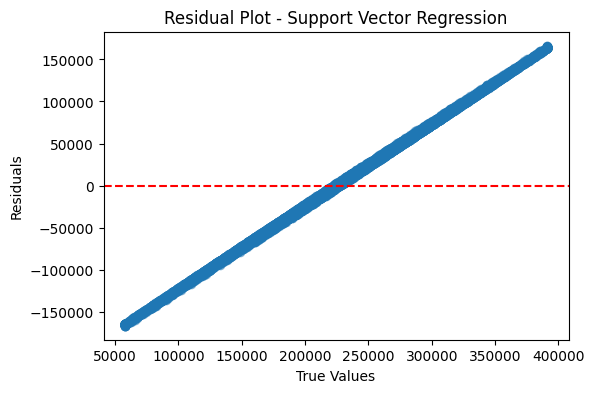

In [43]:
# Residual plot untuk Linear Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test - y_pred_linear, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot - Linear Regression")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

# Residual plot untuk KNN Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test - y_pred_knn, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot - KNN Regression")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

# Residual plot untuk Gradient Boosting Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test - y_pred_gb, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot - Gradient Boosting Regression")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

# Residual plot untuk Support Vector Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test - y_pred_svr, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot - Support Vector Regression")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

Berdasarkan metriks evaluasi yang dipakai Linear Regression menunjukkan nilai MAE dan MSE yang lebih rendah dibandingkan Gradient Boosting Regression, KNN dan Support Vector Regression. Ini mengindikasikan bahwa model ini mampu membuat prediksi yang lebih akurat dan dekat dengan nilai aktual.

Selain itu, nilai R-squared yang lebih tinggi pada Linear Regression menunjukkan bahwa model ini dapat menjelaskan variabilitas data dengan lebih baik. Artinya, model mampu menangkap pola dalam data dan hubungan antara variabel independen dan dependen dengan lebih baik.

Maka dari itu, model dengan algoritma Linear Regression akan digunakan untuk deployment

### Deployment

In [45]:
import joblib

# Simpan model Linear Regression ke dalam file 'linear_regression_model.pkl'
joblib.dump(linear_model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [46]:
pip freeze > requirements.txt